In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
image = cv2.imread('eye.jpg')

# Convert to RGB
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

AFFINE TRANSFORMATION

In [8]:
resized = cv2.resize(image, (200,200))
#TRANSLATION
#Parameters : input image ,M:tranformation matrix .dsize: size of output image
M = np.float32([[1,0,50],[0,1,30]])
translated = cv2.warpAffine(image,M,(image.shape[1], image.shape[0])) # 1 is width 0 is height and 2 is dimension

roatation

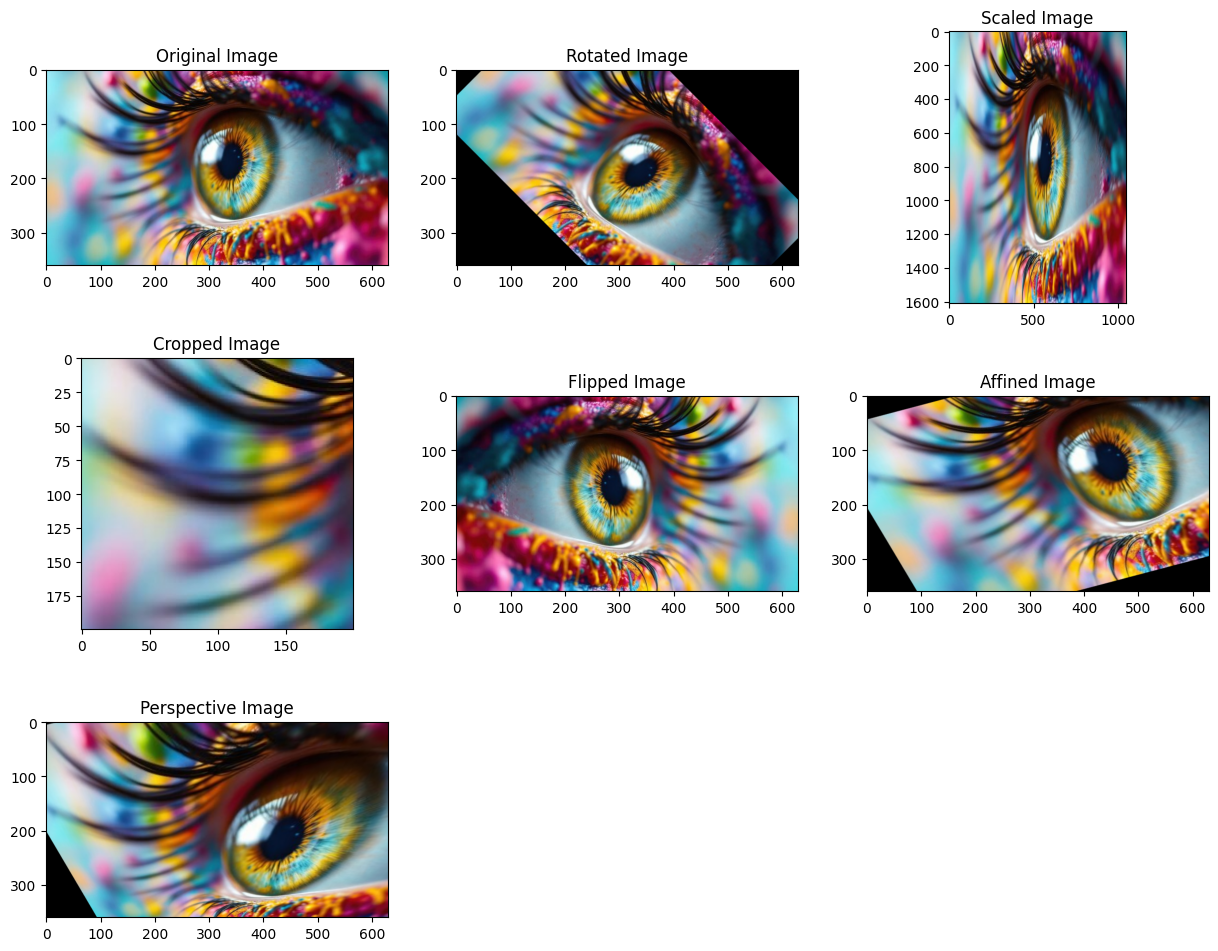

In [20]:
#Rotation 
#cv2.getRotationMatrix2D(center, angle, scale) angle-A positive values rotates the image anti-clockwise,while a negative value rotates it clockwise.
(h,w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.figure(figsize=(15,12))

#Scaling 
#src : input image,dsize : size of output image,fx: scale factor along horizontal axis,fy: scale factor along vertical axis,interpolation : interpolation method
#use either dsize or fx/fy for scaling
#scaled = cv2.resize(image, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_CUBIC)
scaled = cv2.resize(image, (1050,1610), interpolation=cv2.INTER_CUBIC)

#Cropping
cropped = image[50:250, 50:250]

#Flipping
#flip code: 0 -flipping around x-axis,+value - flipping around y-axis,-ve - flipping around both axis
flipped = cv2.flip(image, 1) 

#Affline Transformation
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1, pts2)
affine = cv2.warpAffine(image, M, (w, h))

#Perspective Transformation
pts1 = np.float32([[56,50],[250,50],[50,250],[250,250]])
pts2 = np.float32([[10,100],[300,50],[100,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1, pts2)
perspective = cv2.warpPerspective(image, M, (w, h))

plt.subplot(3,3,1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(3,3,2)
plt.title("Rotated Image")
plt.imshow(rotated)

plt.subplot(3,3,3)
plt.title("Scaled Image")
plt.imshow(scaled)

plt.subplot(3,3,4)
plt.title("Cropped Image")
plt.imshow(cropped)

plt.subplot(3,3,5)
plt.title("Flipped Image")
plt.imshow(flipped)

plt.subplot(3,3,6)
plt.title("Affined Image")
plt.imshow(affine)

plt.subplot(3,3,7)
plt.title("Perspective Image")
plt.imshow(perspective)


(np.float64(-0.5), np.float64(629.5), np.float64(359.5), np.float64(-0.5))

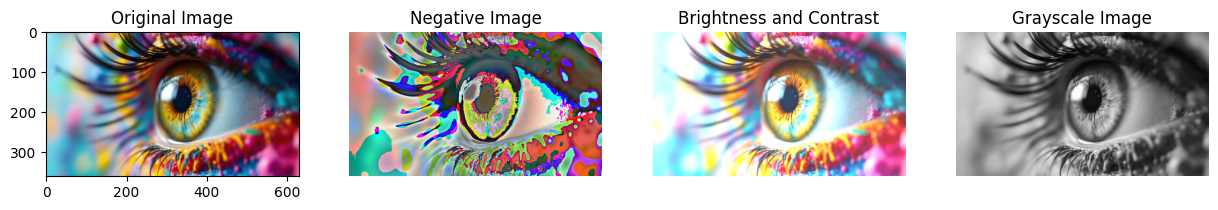

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(4,4,9)
plt.title("Original Image")
plt.imshow(image)

# Image Negative 
negative = 100 - image
plt.subplot(4,4,10)
plt.title("Negative Image")
plt.imshow(negative)
plt.axis('off')

#Brightness and contrast adjustment

bright = cv2.convertScaleAbs(image, alpha=1.2, beta=50)
plt.subplot(4,4,11)
plt.title("Brightness and Contrast")
plt.imshow(bright)
plt.axis('off')

#Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.subplot(4,4,12)
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis('off')